# part 1

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [89]:
import numpy as np
import pandas as pd
from collections import deque


class DBSCAN(object):
    def __init__(self, metric='minkowski', p=2, eps=2, minPoints=2):
        self.metric = metric
        self.p = p
        self.eps=eps
        self.minPoints=minPoints
        self.X = None
        self.labels_ = None
        self._check_metrics()
     
    def _check_metrics(self):
        if self.metric not in ['minkowski', 'manhattan', 'chebyshev']:
            raise ValueError(f'Metric "{self.metric}" is not valid. Use "minkowski", "manhattan", or "chebyshev"')
    
    def __repr__(self):
        return f"""DBSCAN(eps=2, minPoints=2, metric={self.metric}, p={2}))"""
    
    def fit(self, X):
        
        if isinstance(X, pd.core.series.Series):
            X = X.to_numpy()
        if X.ndim==1:
            X = X.reshape(-1,1)
        
        self.X = X
        self.labels_ = np.empty(self.X.shape[0])
        self.labels_[:]=np.nan
        
        self._cluster()
        
        return self
        
    def _cluster(self):
        C=-1
        for index, point in enumerate(self.X):
            if ~np.isnan(self.labels_[index]):
                continue
                
            neighbors, num_neighbors = self.range_query(point)
            
            if num_neighbors<self.minPoints:
                self.labels_[index]=-1
                continue
                
            C=C+1
            
            self.labels_[index]=C
            
            set_of_reachables_indices =  np.delete(neighbors, np.where(neighbors==index))
            q = deque(set_of_reachables_indices)
            while q:
                reachable_indice = q.pop()
                if self.labels_[reachable_indice]==-1:
                    self.labels_[reachable_indice]=C
                if ~np.isnan(self.labels_[reachable_indice]):
                    continue
                self.labels_[reachable_indice]=C
                reachable_neighbors, num_reachable_neighbors = self.range_query(self.X[reachable_indice,:])
                if num_reachable_neighbors>= self.minPoints:
                    q.extend(reachable_neighbors)
        self.labels_ = self.labels_.astype('int')
            
    
    def range_query(self, p):
        along_axis_diffs = self.X[:,np.newaxis,:] - p
        if self.metric == 'minkowski':
            distances = np.power(np.power(np.abs(along_axis_diffs), self.p).sum(axis=-1), 1/self.p)
        if self.metric == 'manhattan':
            distances = np.abs(along_axis_diffs).sum(axis=-1)
        if self.metric == 'chebyshev':
            distances = np.abs(along_axis_diffs).max(axis=-1)
            
        assert distances.shape==(self.X.shape[0],1)
        distances = distances.reshape(-1)
        
        indices = np.argwhere(distances<=self.eps).ravel()
        N = len(indices)
        
        return indices, N

# part 2

In [119]:

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

    
    
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df


data = load_iris()
df = sklearn_to_df(data)


X_train = df.drop('target', axis=1).to_numpy()
y_train = df['target'].to_numpy()



neigh = KNeighborsClassifier(3)
nbrs = neigh.fit(X_train, y_train)
distances, indices = nbrs.kneighbors(X_train)


0.96

In [120]:
def euclidean_distance(x1):
    return np.sqrt(np.sum((x1)**2))

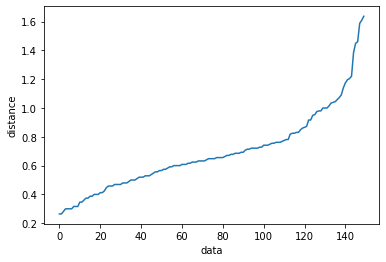

In [128]:
neigh = KNeighborsClassifier(5)
nbrs = neigh.fit(X_train, y_train)
distances, indices = nbrs.kneighbors(X_train)

dist_list = []
for i in range(len(distances)):
    dist_list.append(euclidean_distance(distances[i]))
    
distances = np.sort(dist_list, axis=0)
plt.xlabel('data')
plt.ylabel('distance')
plt.plot(distances)
 

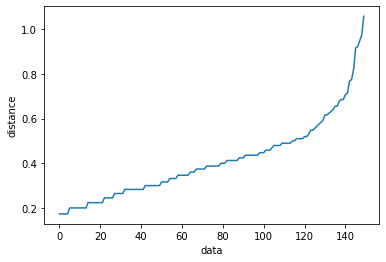

In [129]:
neigh = KNeighborsClassifier(3)
nbrs = neigh.fit(X_train, y_train)
distances, indices = nbrs.kneighbors(X_train)

dist_list = []
for i in range(len(distances)):
    dist_list.append(euclidean_distance(distances[i]))
    
distances = np.sort(dist_list, axis=0)
plt.xlabel('data')
plt.ylabel('distance')
plt.plot(distances)
 

In [126]:
dbscan = DBSCAN(eps=0.8, minPoints=2).fit(X_train)

In [127]:
accuracy(y_train, dbscan.labels_)

0.68